# Import packages

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Import paths

In [9]:
# Paths
train_base_path = "/Users/giakhanh/Desktop/Deep Learning/Project1/data/official_data"
train_csv_path = "/Users/giakhanh/Desktop/Deep Learning/Project1/DL_Project/official_data/train.csv"
validation_base_path = "/Users/giakhanh/Desktop/Deep Learning/Project1/data/official_data"
validation_csv_path = "/Users/giakhanh/Desktop/Deep Learning/Project1/DL_Project/official_data/validation.csv"
test_base_path = "/Users/giakhanh/Desktop/Deep Learning/Project1/data/official_data/"
test_csv_path = "/Users/giakhanh/Desktop/Deep Learning/Project1/DL_Project/official_data/test.csv"

# Image parameters
image_height, image_width = 128, 128
batch_size = 32

# Preprocess images

In [7]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [10]:
# Function to preprocess images
def load_image(filepath, label):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_png(image, channels=3)  # Change to decode_jpeg if images are JPEG format
    image = tf.image.resize(image, [image_height, image_width])
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

# Load Training Data
train_df = pd.read_csv(train_csv_path)
train_file_paths = [os.path.join(train_base_path, fname) for fname in train_df['Path']]
train_class_ids = train_df['ClassId']

train_dataset = tf.data.Dataset.from_tensor_slices((train_file_paths, train_class_ids))
train_dataset = train_dataset.map(load_image).shuffle(buffer_size=1000).batch(batch_size)

# Load Validation Data
validation_df = pd.read_csv(validation_csv_path)
validation_file_paths = [os.path.join(validation_base_path, fname) for fname in validation_df['Path']]
validation_class_ids = validation_df['ClassId']

validation_dataset = tf.data.Dataset.from_tensor_slices((validation_file_paths, validation_class_ids))
validation_dataset = validation_dataset.map(load_image).batch(batch_size)

# Load Test Data
test_df = pd.read_csv(test_csv_path)
test_file_paths = [os.path.join(test_base_path, fname) for fname in test_df['Path']]
test_class_ids = test_df['ClassId']

test_dataset = tf.data.Dataset.from_tensor_slices((test_file_paths, test_class_ids))
test_dataset = test_dataset.map(load_image).batch(batch_size)

# Check Dataset
for images, labels in train_dataset.take(1):
    print(f"Train batch images shape: {images.shape}")
    print(f"Train batch labels shape: {labels.shape}")

for images, labels in test_dataset.take(1):
    print(f"Test batch images shape: {images.shape}")
    print(f"Test batch labels shape: {labels.shape}")


for images, labels in validation_dataset.take(1):
    print(f"Validation batch images shape: {images.shape}")
    print(f"Validation batch labels shape: {labels.shape}")


2025-01-15 21:59:57.630301: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-15 21:59:57.630430: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-01-15 21:59:57.779932: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Train batch images shape: (32, 128, 128, 3)
Train batch labels shape: (32,)
Test batch images shape: (32, 128, 128, 3)
Test batch labels shape: (32,)
Validation batch images shape: (32, 128, 128, 3)
Validation batch labels shape: (32,)


In [11]:
def get_dataset_info(dataset, dataset_name):
    total_samples = 0
    for batch_images, batch_labels in dataset:
        batch_size = batch_images.shape[0]
        print(f"{dataset_name} - Batch images shape: {batch_images.shape}, Batch labels shape: {batch_labels.shape}")
        total_samples += batch_size
    print(f"{dataset_name} - Total samples: {total_samples}")

# EDA

In [12]:
# Get Training Dataset Info
print("Training Dataset Info:")
get_dataset_info(train_dataset, "Training")

Training Dataset Info:
Training - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Training - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Training - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Training - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Training - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Training - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Training - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Training - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Training - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Training - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Training - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Training - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Training - Batch images shape: (32, 128, 128, 3), Batch labels sh

In [13]:
# Get Validation Dataset Info
print("\nValidation Dataset Info:")
get_dataset_info(validation_dataset, "Validation")


Validation Dataset Info:
Validation - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Validation - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Validation - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Validation - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Validation - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Validation - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Validation - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Validation - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Validation - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Validation - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Validation - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Validation - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Validation - Batch images shape: (32, 

In [14]:
# Get Test Dataset Info
print("\nTest Dataset Info:")
get_dataset_info(test_dataset, "Test")


Test Dataset Info:
Test - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Test - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Test - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Test - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Test - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Test - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Test - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Test - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Test - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Test - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Test - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Test - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Test - Batch images shape: (32, 128, 128, 3), Batch labels shape: (32,)
Test - Batch images shape: (32, 128, 128, 3)


Training Class Distribution:
ClassId
2     2100
1     2058
13    2016
12    1953
38    1932
10    1869
4     1848
5     1743
25    1386
9     1365
7     1323
3     1302
8     1302
11    1218
18    1113
35    1113
17    1029
14     735
31     735
33     629
15     588
26     546
28     483
23     462
30     420
6      399
16     399
34     378
36     357
22     357
20     315
40     315
21     294
39     273
29     252
24     252
42     231
27     210
32     210
41     210
37     189
0      189
19     189
Name: count, dtype: int64


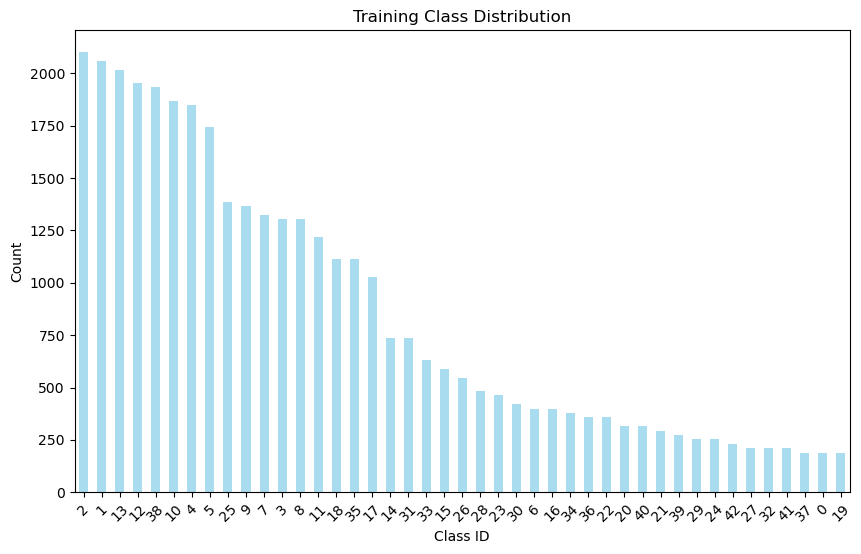


Validation Class Distribution:
ClassId
2     300
1     294
13    288
12    279
38    276
10    267
4     264
5     249
25    198
9     195
7     189
8     186
3     186
11    174
35    159
18    159
17    147
31    105
14    105
33     90
15     84
26     78
28     69
23     66
30     60
16     57
6      57
34     54
36     51
22     51
40     45
20     45
21     42
39     39
29     36
24     36
42     33
27     30
41     30
32     30
19     27
0      27
37     27
Name: count, dtype: int64


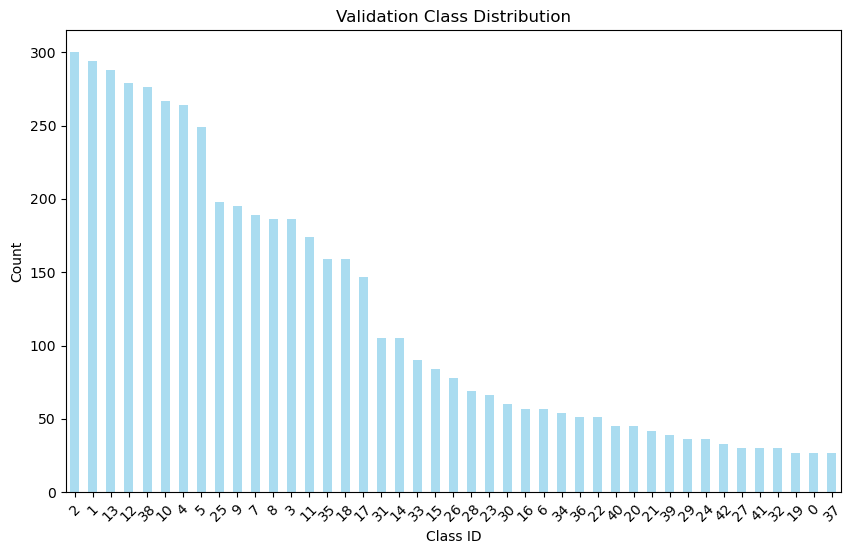


Test Class Distribution:
ClassId
2     600
1     588
13    576
12    558
38    552
10    534
4     528
5     498
25    396
9     390
7     378
8     372
3     372
11    348
35    318
18    318
17    294
31    210
14    210
33    180
15    168
26    156
28    138
23    132
30    120
16    114
6     114
34    108
36    102
22    102
20     90
40     90
21     84
39     78
24     72
29     72
42     66
32     60
27     60
41     60
37     54
0      54
19     54
Name: count, dtype: int64


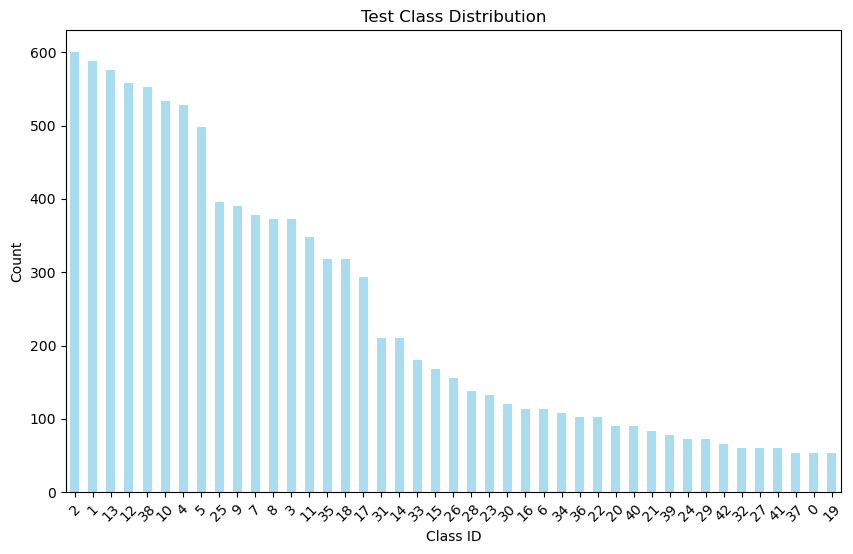

In [15]:
# Function to count class distribution
def plot_class_distribution(dataframe, dataset_name):
    class_counts = dataframe['ClassId'].value_counts()
    print(f"\n{dataset_name} Class Distribution:")
    print(class_counts)

    # Plot
    plt.figure(figsize=(10, 6))
    class_counts.plot(kind='bar', color='skyblue', alpha=0.7)
    plt.title(f"{dataset_name} Class Distribution")
    plt.xlabel("Class ID")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Analyze class distribution
plot_class_distribution(train_df, "Training")
plot_class_distribution(validation_df, "Validation")
plot_class_distribution(test_df, "Test")

In [16]:
# Function to check image dimensions
def check_image_dimensions(file_paths):
    dimensions = []
    for file in file_paths[:50]:  # Check only the first 50 images
        with Image.open(file) as img:
            dimensions.append(img.size)
    return dimensions

train_dimensions = check_image_dimensions(train_file_paths)
print(f"Training Image Dimensions (Sample): {train_dimensions[:5]}")


Training Image Dimensions (Sample): [(63, 55), (40, 39), (39, 40), (50, 52), (36, 38)]


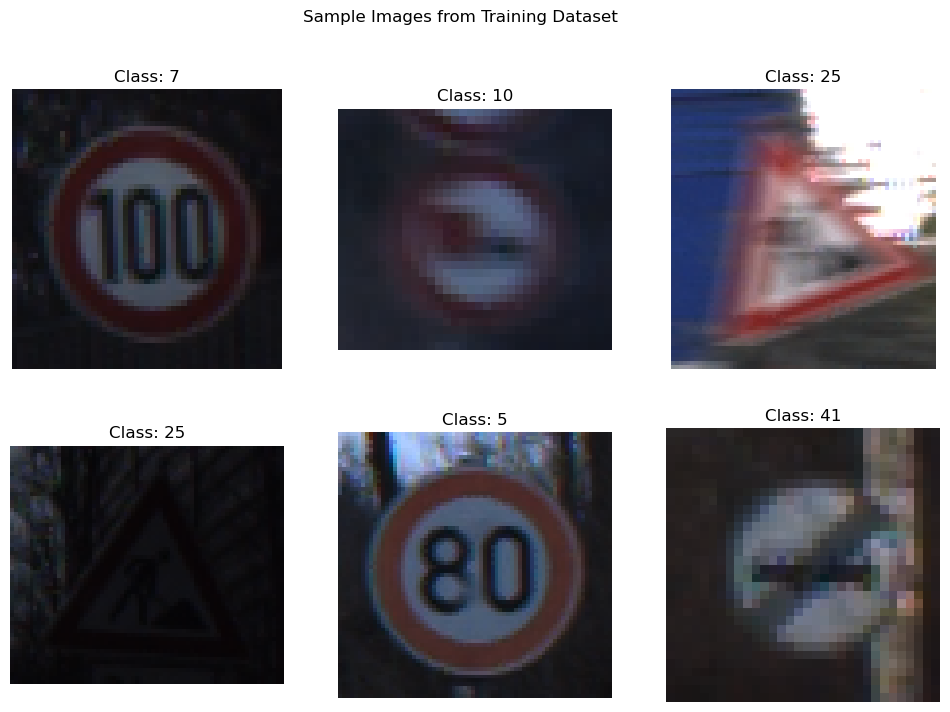

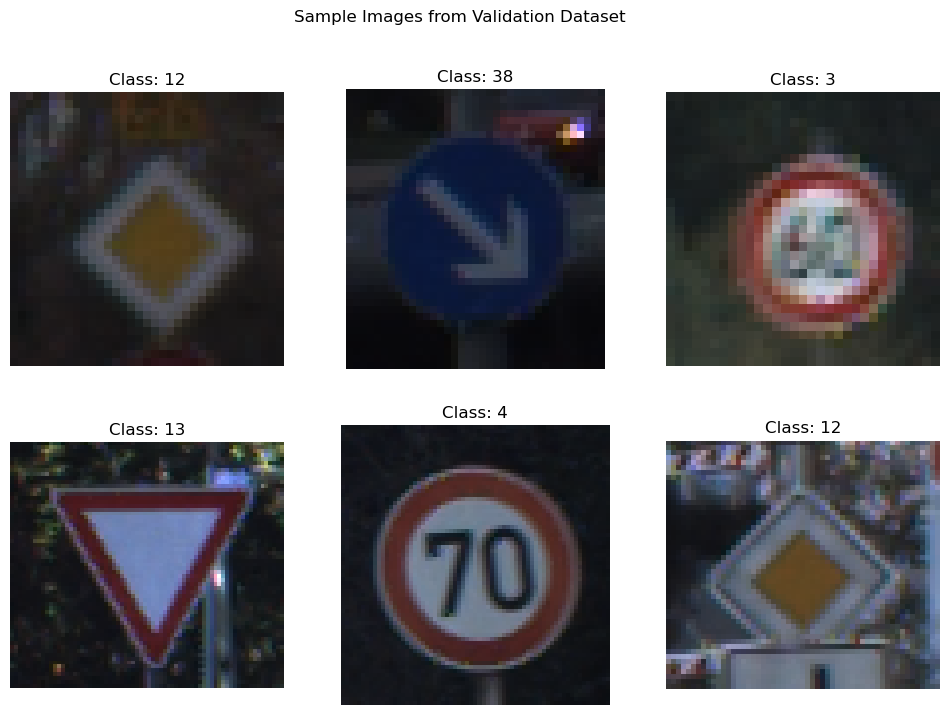

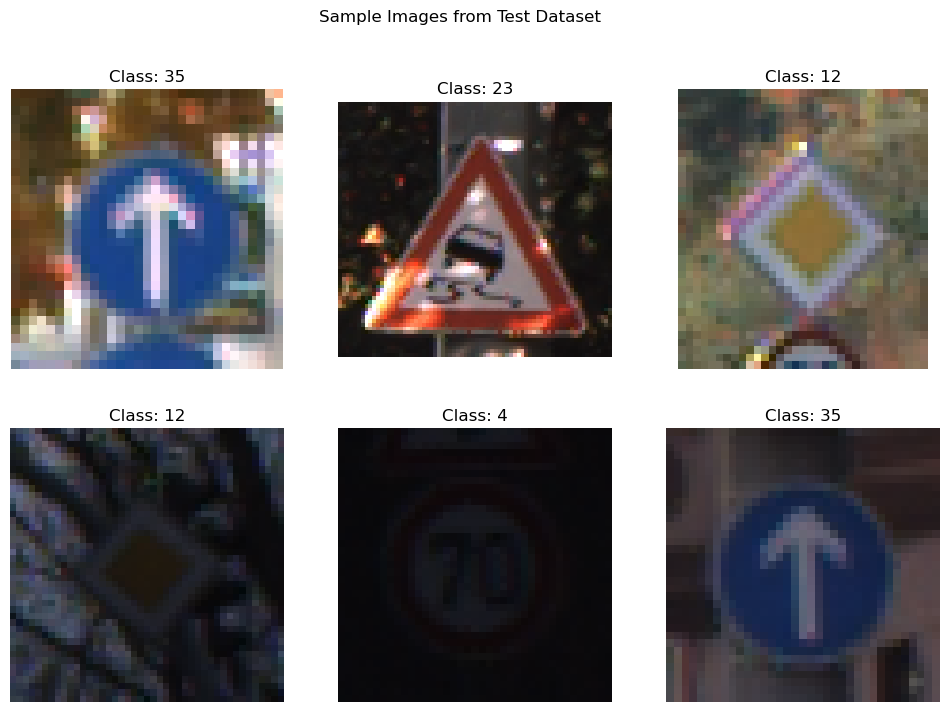

In [17]:
# Function to visualize images
def visualize_images(file_paths, class_ids, dataset_name):
    indices = random.sample(range(len(file_paths)), 6)  # Randomly select 6 images
    selected_files = [file_paths[i] for i in indices]
    selected_labels = [class_ids.iloc[i] for i in indices]

    plt.figure(figsize=(12, 8))
    for i, file in enumerate(selected_files):
        with Image.open(file) as img:
            plt.subplot(2, 3, i + 1)
            plt.imshow(img)
            plt.title(f"Class: {selected_labels[i]}")
            plt.axis('off')
    plt.suptitle(f"Sample Images from {dataset_name} Dataset")
    plt.show()

# Visualize images
visualize_images(train_file_paths, train_df['ClassId'], "Training")
visualize_images(validation_file_paths, validation_df['ClassId'], "Validation")
visualize_images(test_file_paths, test_df['ClassId'], "Test")

In [18]:
# Check for missing values
print("\nChecking for Missing Values:")
print("Training Data:", train_df.isnull().sum())
print("Validation Data:", validation_df.isnull().sum())
print("Test Data:", test_df.isnull().sum())


Checking for Missing Values:
Training Data: Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64
Validation Data: Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64
Test Data: Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64


In [19]:
# Function to summarize dataset
def summarize_dataset(dataframe, dataset_name):
    print(f"\nSummary of {dataset_name} Dataset:")
    print(f"Total Samples: {len(dataframe)}")
    print(f"Number of Classes: {dataframe['ClassId'].nunique()}")
    print(f"Classes: {sorted(dataframe['ClassId'].unique())}")

summarize_dataset(train_df, "Training")
summarize_dataset(validation_df, "Validation")
summarize_dataset(test_df, "Test")


Summary of Training Dataset:
Total Samples: 36287
Number of Classes: 43
Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]

Summary of Validation Dataset:
Total Samples: 5184
Number of Classes: 43
Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]

Summary of Test Dataset:
Total Samples: 10368
Number of Classes: 43
Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


# VGG16

In [20]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.backend import clear_session
from tensorflow.keras.utils import get_custom_objects

# Clear session and custom objects
clear_session()
get_custom_objects().clear()

In [22]:
# Parameters
num_classes = train_df['ClassId'].nunique()
image_height, image_width = 128, 128
batch_size = 32
epochs = 20  # Adjust as needed

# Load Pretrained VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

# Build the model
vgg16_model = Model(inputs=base_model.input, outputs=output_layer)
vgg16_model.summary()

# Compile the model
vgg16_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Define Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_vgg16_weights.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)
]

# Train the model
vgg16_history = vgg16_model.fit(
    train_dataset,
    validation_data=validation_dataset,  # Validation dataset
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks
)


# Load the best weights into the model
vgg16_model.load_weights('/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_vgg16_weights.weights.h5')

# Save the full model manually in `.h5` format
saved_model_path_vgg16 = "/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_vgg16_model.h5"
vgg16_model.save(saved_model_path_vgg16)
print(f"VGG16 Model saved at {saved_model_path_vgg16}")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

2025-01-15 22:03:00.579689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1134/1134 [==============================] - ETA: 0s - loss: 1.5356 - accuracy: 0.5496

2025-01-15 22:04:40.459664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1134/1134 [==============================] - 114s 100ms/step - loss: 1.5356 - accuracy: 0.5496 - val_loss: 0.7679 - val_accuracy: 0.7828
Epoch 2/20
1134/1134 [==============================] - 112s 99ms/step - loss: 0.8282 - accuracy: 0.7423 - val_loss: 0.5496 - val_accuracy: 0.8410
Epoch 3/20
1134/1134 [==============================] - 113s 100ms/step - loss: 0.6233 - accuracy: 0.8051 - val_loss: 0.4682 - val_accuracy: 0.8723
Epoch 4/20
1134/1134 [==============================] - 112s 99ms/step - loss: 0.5205 - accuracy: 0.8325 - val_loss: 0.3711 - val_accuracy: 0.8837
Epoch 5/20
1134/1134 [==============================] - 113s 100ms/step - loss: 0.4557 - accuracy: 0.8564 - val_loss: 0.3653 - val_accuracy: 0.8848
Epoch 6/20
1134/1134 [==============================] - 114s 101ms/step - loss: 0.4053 - accuracy: 0.8705 - val_loss: 0.2996 - val_accuracy: 0.9086
Epoch 7/20
1134/1134 [==============================] - 118s 104ms/step - loss: 0.3725 - accuracy: 0.8797 - val_loss: 0.2855 

# VGG19

In [24]:
from tensorflow.keras.applications import VGG19

In [25]:
# Parameters
num_classes = train_df['ClassId'].nunique()
image_height, image_width = 128, 128
batch_size = 32
epochs = 20  # Adjust as needed

# Load Pretrained VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

# Build the model
vgg19_model = Model(inputs=base_model.input, outputs=output_layer)
vgg19_model.summary()

# Compile the model
vgg19_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Define Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_vgg19_weights.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)
]

# Train the model
vgg19_history = vgg19_model.fit(
    train_dataset,
    validation_data=validation_dataset,  # Validation dataset
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks
)

# Load the best weights into the model
vgg19_model.load_weights('/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_vgg19_weights.weights.h5')

# Save the full model manually in .h5 format
saved_model_path_vgg19 = "/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_vgg19_model.h5"
vgg19_model.save(saved_model_path_vgg19)
print(f"VGG19 Model saved at {saved_model_path_vgg19}")


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

2025-01-15 22:41:01.382371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1134/1134 [==============================] - ETA: 0s - loss: 2.1302 - accuracy: 0.3759

2025-01-15 22:42:54.873318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1134/1134 [==============================] - 129s 114ms/step - loss: 2.1302 - accuracy: 0.3759 - val_loss: 1.3806 - val_accuracy: 0.5760
Epoch 2/20
1134/1134 [==============================] - 129s 113ms/step - loss: 1.4941 - accuracy: 0.5308 - val_loss: 1.0582 - val_accuracy: 0.6595
Epoch 3/20
1134/1134 [==============================] - 129s 114ms/step - loss: 1.2777 - accuracy: 0.5937 - val_loss: 0.9613 - val_accuracy: 0.7074
Epoch 4/20
1134/1134 [==============================] - 128s 113ms/step - loss: 1.1471 - accuracy: 0.6315 - val_loss: 0.7846 - val_accuracy: 0.7560
Epoch 5/20
1134/1134 [==============================] - 132s 116ms/step - loss: 1.0511 - accuracy: 0.6634 - val_loss: 0.7439 - val_accuracy: 0.7743
Epoch 6/20
1134/1134 [==============================] - 133s 117ms/step - loss: 0.9753 - accuracy: 0.6840 - val_loss: 0.6436 - val_accuracy: 0.8129
Epoch 7/20
1134/1134 [==============================] - 133s 117ms/step - loss: 0.9073 - accuracy: 0.7043 - val_loss: 0.591

# RESNET50

In [26]:
from tensorflow.keras.applications import ResNet50

In [27]:
# Image parameters
image_height, image_width = 128, 128
batch_size = 32

# Parameters
num_classes = train_df['ClassId'].nunique()
epochs = 20  # Adjust as needed

# Load Pretrained ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

# Build the model
resnet50_model = Model(inputs=base_model.input, outputs=output_layer)
resnet50_model.summary()

# Compile the model
resnet50_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Define Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_resnet50_weights.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)
]

# Train the model
resnet50_history = resnet50_model.fit(
    train_dataset,
    validation_data=validation_dataset,  # Validation dataset
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks
)

# Load the best weights into the model
resnet50_model.load_weights('/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_resnet50_weights.weights.h5')

# Save the full model manually in .h5 format
saved_model_path_resnet50 = "/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_resnet50_model.h5"
resnet50_model.save(saved_model_path_resnet50)
print(f"ResNet50 Model saved at {saved_model_path_resnet50}")

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

2025-01-15 23:26:17.498016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1134/1134 [==============================] - ETA: 0s - loss: 3.4013 - accuracy: 0.0852

2025-01-15 23:27:22.024657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1134/1134 [==============================] - 75s 64ms/step - loss: 3.4013 - accuracy: 0.0852 - val_loss: 3.1376 - val_accuracy: 0.1732
Epoch 2/20
1134/1134 [==============================] - 71s 62ms/step - loss: 3.1536 - accuracy: 0.1194 - val_loss: 2.9726 - val_accuracy: 0.2097
Epoch 3/20
1134/1134 [==============================] - 70s 62ms/step - loss: 3.0241 - accuracy: 0.1456 - val_loss: 2.7523 - val_accuracy: 0.2654
Epoch 4/20
1134/1134 [==============================] - 70s 62ms/step - loss: 2.9150 - accuracy: 0.1653 - val_loss: 2.6223 - val_accuracy: 0.2629
Epoch 5/20
1134/1134 [==============================] - 70s 62ms/step - loss: 2.8161 - accuracy: 0.1843 - val_loss: 2.5262 - val_accuracy: 0.2936
Epoch 6/20
1134/1134 [==============================] - 71s 62ms/step - loss: 2.7520 - accuracy: 0.1979 - val_loss: 2.4445 - val_accuracy: 0.2955
Epoch 7/20
1134/1134 [==============================] - 72s 63ms/step - loss: 2.7046 - accuracy: 0.2066 - val_loss: 2.3845 - val_accura

# Custom CNN

In [28]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
# Custom CNN
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_model.summary()

# Compile the CNN model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Define Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_cnn_weights.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)
]

# Train the CNN model
cnn_history = cnn_model.fit(
    train_dataset,
    validation_data=validation_dataset,  # Validation dataset
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks
)

# Load the best weights into the model
cnn_model.load_weights('/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_cnn_weights.weights.h5')

# Save the full model manually in .h5 format
saved_model_path_cnn = "/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_cnn_model.h5"
cnn_model.save(saved_model_path_cnn)
print(f"CNN Model saved at {saved_model_path_cnn}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

2025-01-15 23:50:17.041123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1134/1134 [==============================] - ETA: 0s - loss: 1.2492 - accuracy: 0.6364

2025-01-15 23:50:51.672697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1134/1134 [==============================] - 37s 31ms/step - loss: 1.2492 - accuracy: 0.6364 - val_loss: 0.2257 - val_accuracy: 0.9423
Epoch 2/20
1134/1134 [==============================] - 34s 30ms/step - loss: 0.2723 - accuracy: 0.9197 - val_loss: 0.1136 - val_accuracy: 0.9688
Epoch 3/20
1134/1134 [==============================] - 34s 30ms/step - loss: 0.1528 - accuracy: 0.9543 - val_loss: 0.0776 - val_accuracy: 0.9797
Epoch 4/20
1134/1134 [==============================] - 34s 30ms/step - loss: 0.1064 - accuracy: 0.9687 - val_loss: 0.0622 - val_accuracy: 0.9848
Epoch 5/20
1134/1134 [==============================] - 34s 30ms/step - loss: 0.0825 - accuracy: 0.9751 - val_loss: 0.0458 - val_accuracy: 0.9900
Epoch 6/20
1134/1134 [==============================] - 35s 31ms/step - loss: 0.0691 - accuracy: 0.9783 - val_loss: 0.0518 - val_accuracy: 0.9878
Epoch 7/20
1134/1134 [==============================] - 35s 31ms/step - loss: 0.0561 - accuracy: 0.9828 - val_loss: 0.0386 - val_accura

## Evaluate

In [30]:
# Load Best Models
vgg16_best_model = tf.keras.models.load_model('/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_vgg16_model.h5')
vgg19_best_model = tf.keras.models.load_model('/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_vgg19_model.h5')
resnet50_best_model = tf.keras.models.load_model('/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_resnet50_model.h5')
cnn_best_model = tf.keras.models.load_model('/Users/giakhanh/Desktop/Deep Learning/Project1/model_ouput/best_cnn_model.h5')

# Evaluate Models on Test Dataset
vgg16_test_loss, vgg16_test_accuracy = vgg16_best_model.evaluate(test_dataset)
vgg19_test_loss, vgg19_test_accuracy = vgg19_best_model.evaluate(test_dataset)
resnet50_test_loss, resnet50_test_accuracy = resnet50_best_model.evaluate(test_dataset)
cnn_test_loss, cnn_test_accuracy = cnn_best_model.evaluate(test_dataset)

# Print Results
print("Model Test Performances:")
print(f"VGG16 - Loss: {vgg16_test_loss:.4f}, Accuracy: {vgg16_test_accuracy:.4f}")
print(f"VGG19 - Loss: {vgg19_test_loss:.4f}, Accuracy: {vgg19_test_accuracy:.4f}")
print(f"ResNet50 - Loss: {resnet50_test_loss:.4f}, Accuracy: {resnet50_test_accuracy:.4f}")
print(f"CNN - Loss: {cnn_test_loss:.4f}, Accuracy: {cnn_test_accuracy:.4f}")


2025-01-16 00:03:57.506496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


324/324 [==============================] - 26s 81ms/step - loss: 0.1869 - accuracy: 0.9414


2025-01-16 00:04:23.968418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


324/324 [==============================] - 32s 99ms/step - loss: 0.4264 - accuracy: 0.8683


2025-01-16 00:04:56.292530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  6/324 [..............................] - ETA: 3s - loss: 0.0042 - accuracy: 1.0000 

2025-01-16 00:05:13.340923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


324/324 [==============================] - 4s 13ms/step - loss: 0.0426 - accuracy: 0.9915
Model Test Performances:
VGG16 - Loss: 0.1869, Accuracy: 0.9414
VGG19 - Loss: 0.4264, Accuracy: 0.8683
ResNet50 - Loss: 2.0040, Accuracy: 0.3934
CNN - Loss: 0.0426, Accuracy: 0.9915


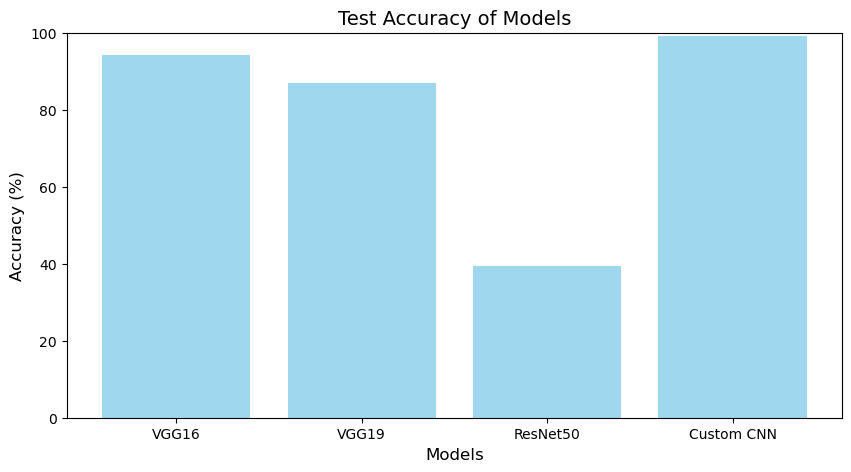

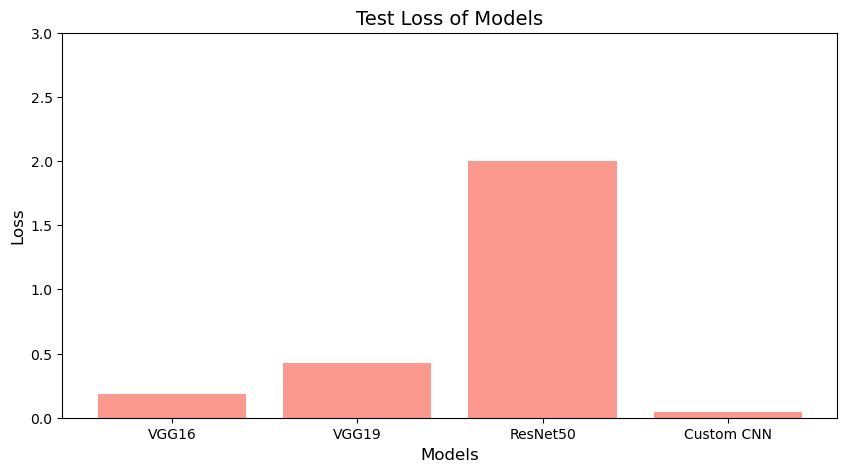

In [31]:
# Evaluation data for the models
models = ["VGG16", "VGG19", "ResNet50", "Custom CNN"]
accuracy = [94.14, 86.83, 39.34, 99.15]
loss = [0.1869, 0.4264, 2.0040, 0.0426]

# Visualizing Accuracy
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color='skyblue', alpha=0.8)
plt.title("Test Accuracy of Models", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(0, 100)
plt.show()

# Visualizing Loss
plt.figure(figsize=(10, 5))
plt.bar(models, loss, color='salmon', alpha=0.8)
plt.title("Test Loss of Models", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.ylim(0, 3)
plt.show()